# ESCUELA COLOMBIANA DE INGENIERÍA:
# PRINCIPIOS Y TECNOLOGÍAS IA 2025-2
## CLASIFICACIÓN INTELIGENTE DE RESIDUOS SÓLIDOS MEDIANTE REDES NEURONALES CONVOLUCIONALES
## PROYECTO

**OBJETIVO GENERAL**

Desarrollar un agente supervisado de clasificación automática de residuos sólidos mediante una red neuronal convolucional (CNN) que permita diferenciar materiales orgánicos, inorgánicos y aprovehcables, contribuyendo a la gestión ambiental sostenible en la ciudad de Bogotá.

**OBJETIVOS**

1. Diseña red convolucional (CNN).
2. Implementar red convolucional (CNN).
3. Evaluar su desempeño mediante métricas apropiadas.


In [1]:
# ---
%pip install -q scikit-learn matplotlib seaborn

%pip install kaggle
# Instala la librería kagglehub
%pip install --quiet kagglehub

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools

import kagglehub
import os

c:\Users\Santiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**Reasoning**:
The `ValueError: 'images' contains no shape` occurs because `tf.image.decode_image` sometimes fails to properly decode certain image files (even those with seemingly valid extensions), returning a tensor without a defined shape. To prevent the pipeline from crashing, I will wrap the decoding and resizing logic in a `tf.py_function` with a `try-except` block. This allows problematic images to be replaced with a blank image, ensuring the dataset processing continues without interruption.



Probando con una imagen de ejemplo...


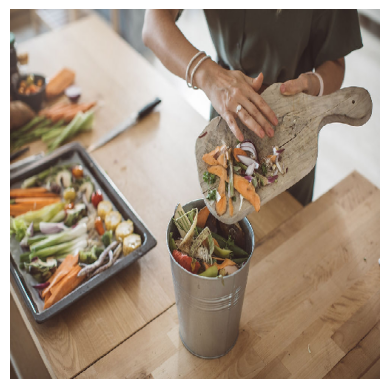

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
 Predicción: Hazardous
 Confianza: 39.47%

--- Probabilidades por clase ---
Hazardous: 75.36%
Non-Recyclable: 13.18%
Organic: 5.33%
Recyclable: 6.13%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

def predict_url(image_url):
    try:
        path = tf.keras.utils.get_file(origin=image_url)
        
        img = keras.utils.load_img(path, target_size=(500, 500))
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        img_array = keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) 

        img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

        predictions = model.predict(img_array)
        score = tf.nn.softmax(predictions[0])
        
        predicted_class = class_names[np.argmax(score)]
        confidence = 100 * np.max(score)
        
        print(f" Predicción: {predicted_class}")
        print(f" Confianza: {confidence:.2f}%")
        
        print("\n--- Probabilidades por clase ---")
        for i, name in enumerate(class_names):
            print(f"{name}: {100 * predictions[0][i]:.2f}%")
            
    except Exception as e:
        print(f" Error al cargar la imagen: {e}")


url = "" 

predict_url(url)